# Altair examples

In [1]:
using VegaDatasets, VegaLite, DataFrames

## Simple Charts

### Simple Bar Chart

```python
import altair as alt
import pandas as pd

data = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(data).mark_bar().encode(
    x='a',
    y='b'
)
```

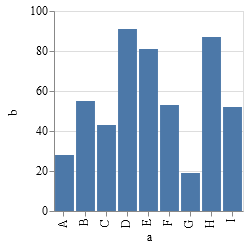

In [2]:
data = DataFrame(a=["A","B","C","D","E","F","G","H","I"],b=[28,55,43,91,81,53,19,87,52])

data |> @vlplot(:bar,enc={x="a:n",y="b:q"})

### Simple Heatmap

```python
import altair as alt
import numpy as np
import pandas as pd

# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
data = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(data).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)
```

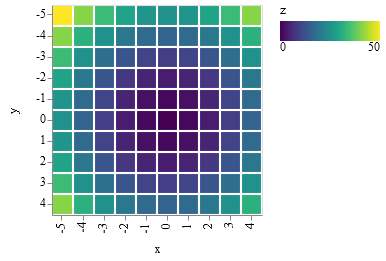

In [3]:
x = [j for i in -5:4, j in -5:4]
y = [i for i in -5:4, j in -5:4]
z = x.^2 .+ y.^2

DataFrame(x=vec(x'),y=vec(y'),z=vec(z')) |>
@vlplot(:rect,enc={x="x:o",y="y:o",color="z:q"})

### Simple Histogram

```python
import altair as alt
from vega_datasets import data

movies = data.movies.url

alt.Chart(movies).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)
```

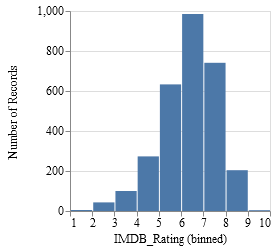

In [4]:
dataset("movies") |>
@vlplot(:bar,enc={x={"IMDB_Rating:q",bin=true},y="count():q"})

### Simple Line Chart

```python
import altair as alt
import numpy as np
import pandas as pd

x = np.arange(100)
data = pd.DataFrame({'x': x,
                     'sin(x)': np.sin(x / 5)})

alt.Chart(data).mark_line().encode(
    x='x',
    y='sin(x)'
)
```

WARN Cannot clearly determine orientation for "line" since both x and y channel encode continuous fields. In this case, we use vertical by default


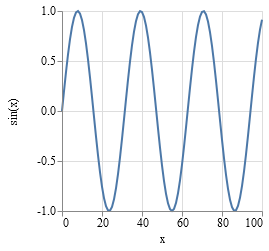

In [5]:
x = 0:100

DataFrame(x=x,sin=sin.(x./5)) |> 
@vlplot(:line,enc={x="x:q",y={"sin:q",title="sin(x)"}})

### Simple Scatter Plot

```python
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color='species'
).interactive()
```

TODO interactive sutff doesn't work properly

WARN Cannot clearly determine orientation for "line" since both x and y channel encode continuous fields. In this case, we use vertical by default
WARN Can not resolve event source: window
WARN Can not resolve event source: window
WARN Can not resolve event source: window
WARN Can not resolve event source: window


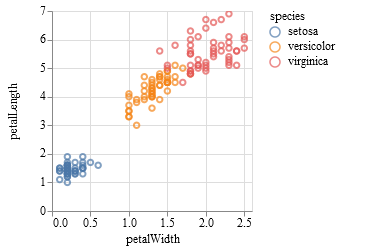

In [6]:
dataset("iris") |>
@vlplot(:point,enc={x="petalWidth:q",y="petalLength:q",color="species:n"}) |> VegaLite.interactive()

#### Simple Stacked Area Chart

```python
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    x="date:T",
    y="count:Q",
    color="series:N"
)
```

WARN A time scale is used with area mark. This can be misleading as the width of the area can be arbitrary based on the scale domain. You may want to use point mark instead.
WARN A time scale is used with area mark. This can be misleading as the width of the area can be arbitrary based on the scale domain. You may want to use point mark instead.


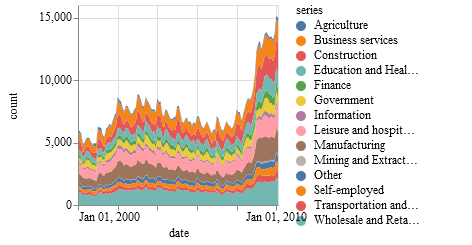

In [7]:
dataset("unemployment-across-industries") |>
@vlplot(:area,enc={x="date:t",y="count:q",color="series:n"})

#### Strip Plot

```python
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O'
)
```

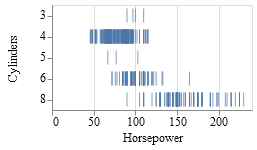

In [8]:
dataset("cars") |>
@vlplot(:tick,enc={x="Horsepower:q",y="Cylinders:o"})